<a href="https://colab.research.google.com/github/Dimisz/tensorflow_lectures/blob/main/CNN_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

# Theoretical Background

## Filters and Image Kernels

Filters are essentially an **image kernel**, which is a small matrix applied to an entire image.

**Applying filter** is:
* 'sliding' the kernel matrix across the entire image with a particular `stride`.
* multipying the image pixels by filter-weights
* <a href="https://setosa.io/ev/image-kernels/" target="_blank">Example of filters in action</a>

The process of applying a filter is sometimes called a **Convolution**. 

The point of CNN is that the network will figure out the weights and decide what **weights matter for image-classification**.


In the context of CNNs these filters are referred to as **convolution kernels**.

The process of passing them over an image is known as **convolution**.

## Convolutional Layers

**Why ANNs are not a good choice for working with images?**:
* Large amount of parameters (100 000 for 28X28 images).
* We have to flatten our images thus losing all the 2D information.
* Will only work on very similar, well-centered images.

(MNIST dataset is 28x28 and well-centered, so the ANN built on the dataset will not generalize well)


A convolutional layer is created when we apply *multiple image filters* to the input images.

The layer will then be trained to figure out **the best filter weight values**.

A CNN also helps to reduce parameters by focusing on **local connectivity**, i.e. not all neurons are fully connected, **neurons are only connected to a subset of local neurons in the next layer** (these end up becoming the filters).



**3D images** can be thought of as 3D Tensors consisting of RGB channels + height + width, e.g (1200, 700, 3).

## Pooling Layers

When dealing with Convolutional layers we have a large amount of parameters.

We can use pooling layers to reduce the number of parameters.

**Pooling Layer** accepts convolutional layers as input.

For a pooling layer we have to decide on: 
* Window-size, e.g. 2x2
* Stride, e.g. 2

Types of pooling layers:
* **Max**: takes the highest value (e.g. if the window-size is 2x2 it will go from left to right from top to bottom picking 4 values at a time and picking up the highest value out of these 4).
* **Average** - pulls the average value out of the 4

*A 2x2 pooling kernel with a stride of 2 removes 75% of the input data*.

## Dropout

**Dropout** is a form of regularization to help prevent overfitting.

During training, units are randomly dropped, along with their connections.

## Famous CNN architectures

* **LeNet-5** by Yann LeCun
* **AlexNet** by Alex Krizhevsky et al.
* **GoogleLeNet** by Szegedy
* **ResNet** by Kaiming He et al.


# Hands-On Practive

## MNIST Dataset

### Reading in and Preparing the Data

In [ ]:
# initial imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Downlloading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
single_image = X_train[0]

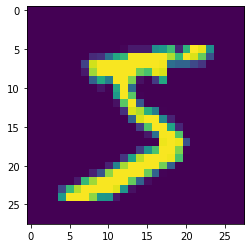

In [ ]:
plt.imshow(single_image)

In [ ]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Convert the labels to categories

We need to convert the labels to categorical (since they are categories expressed in numeric way, the model may mistakenly see it as just a continuous numeric value, not category)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(Y_train)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(Y_test)
y_cat_train = to_categorical(Y_train)

In [ ]:
y_cat_train.shape, y_cat_test.shape

((60000, 10), (10000, 10))

#### Normalize the training data

In [ ]:
single_image.min(), single_image.max()

(0, 255)

We need to normalize the values (make the values between 0 and 1)

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
scaled_image = X_train[0]
scaled_image.min(), scaled_image.max()

(0.0, 1.0)

#### Reshape the data

We need to add one more dimention to let the CNN know we are dealing with one channel

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#batch_size, width, height, color_channels
X_train = X_train.reshape(60000, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

### Creating a Model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(4,4),
                 input_shape=(28,28,1),
                 activation="relu"))

model.add(MaxPool2D(pool_size=(2,2))) #half the kernel_size
model.add(Flatten())
#after flatten can add dense layers
model.add(Dense(128, activation="relu"))

#output layer / 1 neuron per class
model.add(Dense(10, activation="softmax"))


#compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

#### Set up an EarlyStopping callback

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

### Train the model

In [ ]:
model.fit(X_train, 
          y_cat_train,
          epochs=10,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1370 - accuracy: 0.9598 - val_loss: 0.0583 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.0380 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0435 - val_accuracy: 0.9854


### Evaluate the Model

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.137046,0.959833,0.058335,0.9806
1,0.045496,0.986450,0.038025,0.9879
2,0.029978,0.990300,0.043539,0.9854


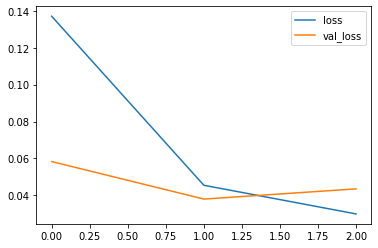

In [ ]:
metrics[['loss', 'val_loss']].plot()

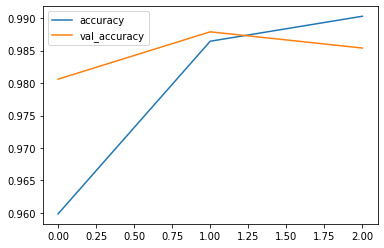

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0435 - accuracy: 0.9854


[0.04353860393166542, 0.9854000210762024]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=1)

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.96      1.00      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.95      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(Y_test, predictions)

array([[ 975,    1,    1,    1,    0,    2,    0,    0,    0,    0],
       [   0, 1131,    2,    0,    0,    2,    0,    0,    0,    0],
       [   0,    2, 1025,    1,    0,    0,    0,    3,    0,    1],
       [   0,    0,    2,  998,    0,    8,    0,    0,    1,    1],
       [   2,    0,    1,    0,  971,    0,    1,    0,    0,    7],
       [   0,    0,    0,    3,    0,  888,    1,    0,    0,    0],
       [   5,    3,    1,    0,    3,   11,  935,    0,    0,    0],
       [   0,    1,   12,    0,    0,    0,    0, 1011,    0,    4],
       [   7,    1,   13,    3,    4,    9,    1,    2,  929,    5],
       [   0,    3,    1,    2,    2,    5,    0,    4,    1,  991]])

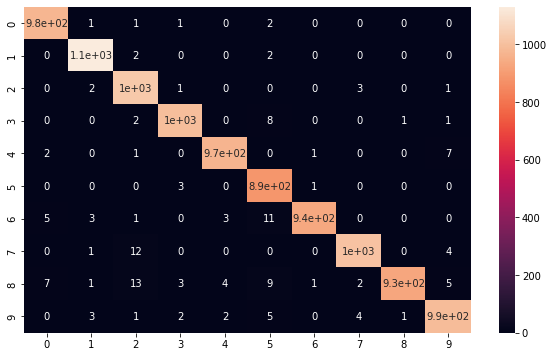

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True)

#### Predict a single image

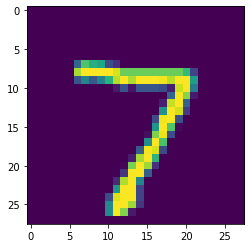

In [ ]:
my_number = X_test[0]
plt.imshow(my_number.reshape(28,28))

In [ ]:
# num_images, width, height, color_channels
np.argmax(model.predict(my_number.reshape(1, 28,28,1)))

7

## CNN on CIFAR (RGB IMAGES)

### Load in and Prepare the Data

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

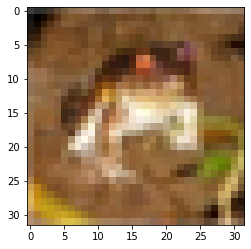

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [ ]:
# Normalize the data
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_categorical_train = to_categorical(y_train,10)
y_categorical_test = to_categorical(y_test,10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

### Build a model

In [ ]:
model = Sequential()

#CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 input_shape=(32,32,3),
                 activation="relu"))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))
#CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 input_shape=(32,32,3),
                 activation="relu"))
#POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))



model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

#### Add Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Fit the model

In [ ]:
model.fit(x_train, y_categorical_train,
          epochs=20,
          validation_data=(x_test, y_categorical_test),
          callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5324 - accuracy: 0.4447 - val_loss: 1.3279 - val_accuracy: 0.5360
Epoch 2/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1788 - accuracy: 0.5839 - val_loss: 1.1563 - val_accuracy: 0.5940
Epoch 3/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0279 - accuracy: 0.6396 - val_loss: 1.0370 - val_accuracy: 0.6373
Epoch 4/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9246 - accuracy: 0.6781 - val_loss: 1.0163 - val_accuracy: 0.6418
Epoch 5/20
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8418 - accuracy: 0.7076 - val_loss: 0.9972 - val_accuracy: 0.6579
Epoch 6/20
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7689 - accuracy: 0.7324 - val_loss: 0.9760 - val_accuracy: 0.6706
Epoch 7/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7023 - accuracy: 0.7545 - val_loss: 0.9343 -

### Evaluate the model

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.532387,0.44468,1.327945,0.5360
1,1.178759,0.58394,1.156325,0.5940
2,1.027945,0.63960,1.037018,0.6373
3,0.924607,0.67810,1.016344,0.6418
4,0.841784,0.70756,0.997189,0.6579
5,0.768874,0.73240,0.975981,0.6706
6,0.702314,0.75454,0.934341,0.6847
7,0.639890,0.77598,0.948091,0.6822
8,0.578630,0.79918,0.973123,0.6951


In [ ]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

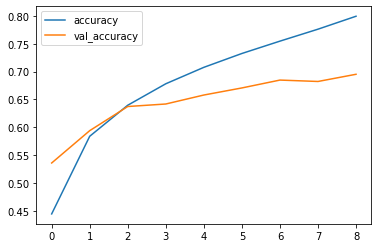

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

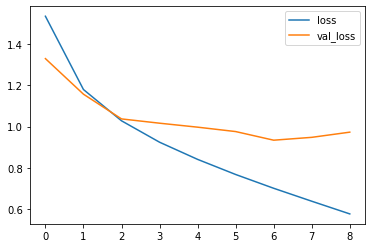

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
model.evaluate(x_test, y_categorical_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9731 - accuracy: 0.6951


[0.9731229543685913, 0.6951000094413757]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=1)

In [ ]:
predictions[0]

3

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.73      0.88      0.80      1000
           2       0.60      0.59      0.59      1000
           3       0.54      0.47      0.50      1000
           4       0.64      0.66      0.65      1000
           5       0.65      0.52      0.58      1000
           6       0.71      0.81      0.76      1000
           7       0.78      0.73      0.76      1000
           8       0.78      0.78      0.78      1000
           9       0.76      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.69      0.70      0.69     10000



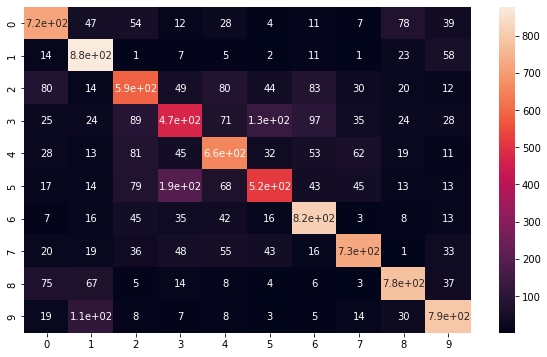

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))

sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

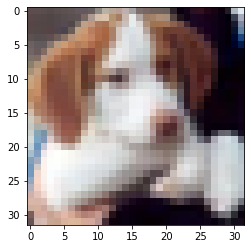

In [ ]:
my_img = x_test[16] #data already scaled
plt.imshow(my_img)

In [ ]:
y_test[16]

array([5], dtype=uint8)

In [ ]:
np.argmax(model.predict(my_img.reshape(1, 32, 32, 3)),axis=1)

array([5])

## CNN with Real Images

### Download and Read In the Images

In [4]:
!gdown --id 1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb

Downloading...
From: https://drive.google.com/uc?id=1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb
To: /content/cell_images.zip
354MB [00:02, 142MB/s]


In [58]:
#unccomment to unzip
#!unzip "/content/cell_images.zip"

In [6]:
import os

In [7]:
data_dir = "/content/cell_images/"

In [8]:
os.listdir(data_dir)

['train', 'test']

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [10]:
from matplotlib.image import imread

In [11]:
test_path = data_dir + "test/"
train_path = data_dir + "train/"
test_path, train_path

('/content/cell_images/test/', '/content/cell_images/train/')

In [12]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [13]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [14]:
#take a look at a single image
random_infected_img = random.choice(os.listdir(train_path+'parasitized'))
para_cell = train_path+'parasitized' +'/'+ random_infected_img
imread(para_cell).shape #transforms png into array

(151, 145, 3)

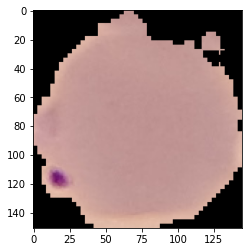

In [15]:
plt.imshow(imread(para_cell))

In [16]:
# random uninfected image
random_uninfected_img = random.choice(os.listdir(train_path+'uninfected'))
uninfected_cell = train_path + 'uninfected/' + random_uninfected_img
uninfected_cell_image = imread(uninfected_cell)
uninfected_cell_image.shape 

(133, 163, 3)

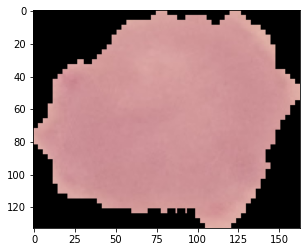

In [17]:
plt.imshow(uninfected_cell_image)

#### Check how many images we have

In [18]:
len(os.listdir(train_path + 'parasitized'))

12480

In [19]:
len(os.listdir(train_path + 'uninfected'))

12480

In [20]:
len(os.listdir(test_path + 'parasitized'))

1300

In [21]:
len(os.listdir(test_path + 'uninfected'))

1300

#### Figure out the average shape of the images

Since these are 'real-life' images, they are of different shape.

We have to figure out their average shape and then reshape the images for their consequent use.

In [22]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + "uninfected"):
  img = imread(test_path + 'uninfected/' + image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


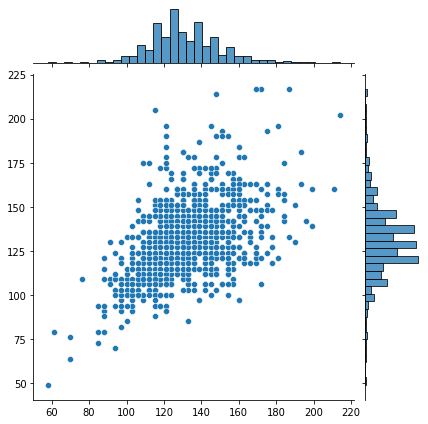

In [23]:
sns.jointplot(dim1, dim2);

In [24]:
np.mean(dim1), np.mean(dim2)

(130.92538461538462, 130.75)

In [25]:
# So we'll resize all the images to (130, 130, 3)
image_shape = (130, 130, 3)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
imread(para_cell).max(), imread(uninfected_cell).max() #images already rescaled

(0.9137255, 0.89411765)

In [28]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

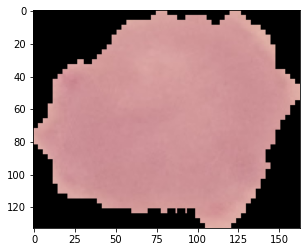

In [29]:
uninfected_img = imread(uninfected_cell)
plt.imshow(uninfected_img)

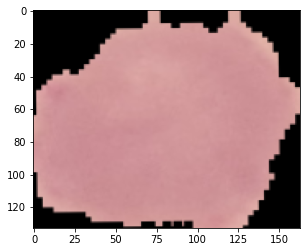

In [30]:
plt.imshow(image_gen.random_transform(uninfected_img))

#### Set up directories to flow batches from them

In [31]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


### Creating a model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, #(130,130,3)
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, #(130,130,3)
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, #(130,130,3)
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [35]:
batch_size=16

In [36]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(130,130),
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [37]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=(130,130),
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit_generator(train_image_gen,
                              epochs=7,
                              validation_data=test_image_gen,
                              #callbacks=[early_stop]
                              )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
1560/1560 [==============================] - 761s 488ms/step - loss: 0.1743 - accuracy: 0.9455 - val_loss: 0.2060 - val_accuracy: 0.9369
Epoch 2/7
1560/1560 [==============================] - 758s 486ms/step - loss: 0.1690 - accuracy: 0.9466 - val_loss: 0.1730 - val_accuracy: 0.9415
Epoch 3/7
1560/1560 [==============================] - 758s 486ms/step - loss: 0.1663 - accuracy: 0.9494 - val_loss: 0.2165 - val_accuracy: 0.9258
Epoch 4/7
1560/1560 [==============================] - 764s 489ms/step - loss: 0.1794 - accuracy: 0.9443 - val_loss: 0.1727 - val_accuracy: 0.9454
Epoch 5/7
1560/1560 [==============================] - 762s 488ms/step - loss: 0.1647 - accuracy: 0.9487 - val_loss: 0.1583 - val_accuracy: 0.9454
Epoch 6/7
1560/1560 [==============================] - 762s 489ms/step - loss: 0.1648 - accuracy: 0.9489 - val_loss: 0.1606 - val_accuracy: 0.9477
Epoch 7/7
1560/1560 [==============================] - 763s 489ms/step - loss: 0.1655 - accuracy: 0.9485 - val_loss: 0

In [ ]:
model.evaluate_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.15816612541675568, 0.9480769038200378]

In [ ]:
model.save("malaria_detection_model.h5")

In [2]:
from tensorflow.keras.models import load_model
downloaded_model = load_model("/malaria_detection_model.h5")

In [38]:
downloaded_model.evaluate_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.15724925696849823, 0.9496153593063354]

### Evaluating the model

In [40]:
pred = downloaded_model.predict_generator(test_image_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [41]:
pred

array([[2.0363927e-04],
       [8.2534032e-05],
       [2.1839142e-04],
       ...,
       [9.3948424e-01],
       [9.5288992e-01],
       [9.2025292e-01]], dtype=float32)

In [43]:
predictions = pred > 0.5
len(predictions)

2600

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [47]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1300
           1       0.93      0.96      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [48]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1203   97]
 [  48 1252]]


In [49]:
from tensorflow.keras.preprocessing import image

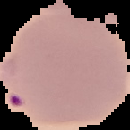

In [51]:
my_image = image.load_img(para_cell, target_size=(130,130,3))
my_image

In [52]:
my_image_array = image.img_to_array(my_image)

In [53]:
my_image_array.shape

(130, 130, 3)

In [55]:
my_image_array = np.expand_dims(my_image_array, axis=0) #add 1 (1,130,130,3)

In [56]:
my_image_array.shape

(1, 130, 130, 3)

In [57]:
downloaded_model.predict(my_image_array)

array([[0.00810227]], dtype=float32)